In [1]:
# https://www.qmunity.tech/tutorials

In [2]:
import numpy as np
import math
from math import sqrt
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit import BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import transpile

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_40692\1742237787.py:7: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer


## Step One : Preparation

In [3]:
def preparation(qc):
    qc.h(0)
    qc.cx(0,1)


## Step Two : Separation

In [4]:
def seperation(qc):
    qc.barrier()

## Step Three : Encoding

In [5]:
## Sender can manipulate h(is/er) part of entangled qubits to encode 2 bits of classical information
def state_00(qc):
    pass

def state_01(qc):
    qc.x(0)

def state_10(qc):
    qc.z(0)
    
def state_11(qc):
    qc.x(0)
    qc.z(0)

def encoding(qc):
    message = input('Enter your intended message from 00, 01, 10 and 11 :   ')
    if message == '00':
        state_00(qc)
    elif message == '01':
        state_01(qc)
    elif message == '10':
        state_10(qc)
    elif message == '11':
        state_11(qc)
    else:
        print('Invalid message: Sending 00')

## Step Four : Transmission

In [6]:
def transmission(qc):
    qc.barrier()

## Step Five : Decoding

In [7]:
## Receiver bell-measures their qubits to retreive the encoded classical bits information:

def bell_measure(qc):
    qc.cx(0,1)
    qc.h(0)
    qc.measure(range(2),range(2))
    display(qc.draw('mpl'))
## Retrieving Information:
    backend_sim = Aer.get_backend('statevector_simulator')
#     backend_real_qc = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= 2
#                                           and not x.configuration().simulator
#                                           and x.status().operational == True))
#     print("Running on: ", backend_real_qc)
#     job = execute(qc,backend_real_qc)
    job = execute(qc,backend_sim)
    result = job.result()
    counts = result.get_counts(qc)
    received = dict([(value,key) for key,value in counts.items()])
    print('Message received: {} '.format(received[1]))
    display(plot_histogram(counts))

## The Complete Protocol in a Simulator

c:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


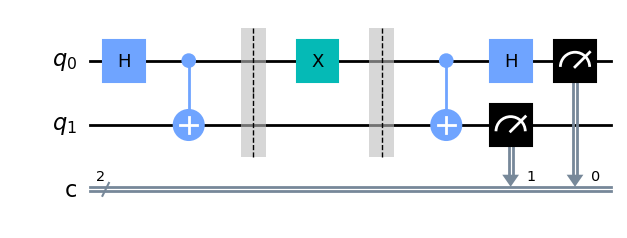

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_40692\1110436761.py:9: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend_sim = Aer.get_backend('statevector_simulator')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_40692\1110436761.py:15: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,backend_sim)


Message received: 10 


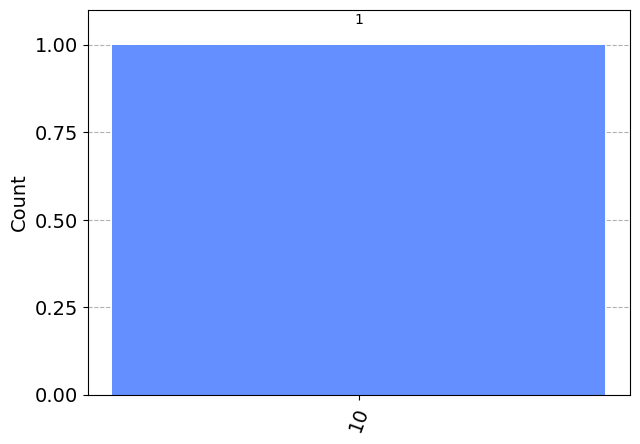

In [8]:
## Initializing:
qc_test = QuantumCircuit(2,2)

## Preparing entangled state:
preparation(qc_test)

## Sender Receiver moves apart:
seperation(qc_test)

## Sender encodes h(is/er) qubit according to intended 2 bits of classical information:
encoding(qc_test)

## Sender transmits h(is/er) encoded qubit physically to receiver:
transmission(qc_test)

# Receiver performs bell-measurement on both qubits to retrieve the encoded 2 bits of information:
bell_measure(qc_test)